In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
cd ../

c:\Users\okpl8\Documents\project_LG


In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train = train.drop('ID', axis = 1)
test = test.drop('ID', axis = 1)

In [5]:
for col in train.columns:
    print(train.value_counts(col))

시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64
임신 시도 또는 마지막 임신 경과 연수
7.0     1214
8.0     1176
9.0     1023
6.0      991
10.0     947
11.0     701
5.0      692
12.0     510
13.0     481
14.0     331
4.0      305
15.0     254
16.0     202
17.0     140
18.0     106
3.0       89
19.0      86
20.0      83
2.0       21
0.0       12
1.0        6
Name: count, dtype: int64
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64
특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST          

In [6]:
train_missing_values = train.isnull().sum()
train_missing_columns=train_missing_values[train_missing_values > 0]

print(train_missing_columns)

임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: i

In [7]:
train.drop(columns=['PGD 시술 여부','PGS 시술 여부','난자 해동 경과일','배아 해동 경과일',
            '임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부'],inplace=True)
test.drop(columns=['PGD 시술 여부','PGS 시술 여부','난자 해동 경과일','배아 해동 경과일',
            '임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부'],inplace=True)

In [8]:
train["특정 시술 유형"] = train["특정 시술 유형"].fillna("Unknown").astype(str)
test["특정 시술 유형"] = test["특정 시술 유형"].fillna("Unknown").astype(str)

def categorize_treatment(x):
    first_part = x.split(":")[0]  # 첫 번째 값 가져오기

    if first_part == "ICSI":
        return "ICSI"
    elif first_part == "IVF":
        return "IVF"
    elif first_part in ["IUI", "ICI"]:
        return "IUI"
    else:
        return "Unknown"

# ✅ 그룹화 적용 (train & test)
train["특정 시술 유형"] = train["특정 시술 유형"].apply(categorize_treatment)
test["특정 시술 유형"] = test["특정 시술 유형"].apply(categorize_treatment)

In [9]:
mode_cols = ["착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "해동 난자 수", "저장된 신선 난자 수", "기증자 정자와 혼합된 난자 수",
             "기증 배아 사용 여부", "대리모 여부"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

최빈값 90% 이상 최빈값

In [10]:
mode_cols = ["단일 배아 이식 여부", "미세주입 후 저장된 배아 수", "해동된 배아 수", "동결 배아 사용 여부", "신선 배아 사용 여부",
             "난자 채취 경과일", "난자 혼합 경과일","저장된 배아 수","미세주입에서 생성된 배아 수","미세주입 배아 이식 수", "미세주입된 난자 수"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

최빈값 50% 이상 최빈값

In [11]:
median_cols = ['총 생성 배아 수','','이식된 배아 수','수집된 신선 난자 수','혼합된 난자 수','파트너 정자와 혼합된 난자 수','배아 이식 경과일']
for col in median_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].median()  # 🚨 Train 데이터의 중앙값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

컬럼 이(가) train 또는 test 데이터에 없습니다.


In [12]:
train.drop(columns=['배란 유도 유형','난자 기증자 나이','정자 기증자 나이'],inplace=True)
test.drop(columns=['배란 유도 유형','난자 기증자 나이','정자 기증자 나이'],inplace=True)

In [13]:
train.drop(columns=['난자 채취 경과일','불임 원인 - 여성 요인','불임 원인 - 정자 면역학적 요인'],inplace=True)
test.drop(columns=['난자 채취 경과일','불임 원인 - 여성 요인','불임 원인 - 정자 면역학적 요인'],inplace=True)

In [14]:
# '난자 출처'에서 최빈값 확인
most_frequent = train['난자 출처'].mode()[0]

# '알 수 없음'을 최빈값으로 대체
train['난자 출처'] = train['난자 출처'].replace('알 수 없음', most_frequent)
test['난자 출처'] = test['난자 출처'].replace('알 수 없음', most_frequent)

print(train['난자 출처'].value_counts())

난자 출처
본인 제공    240582
기증 제공     15769
Name: count, dtype: int64


In [15]:
# '난자 출처'에서 최빈값 확인
most_frequent = train['정자 출처'].mode()[0]

# '알 수 없음'을 최빈값으로 대체
train['정자 출처'] = train['정자 출처'].replace('배우자 및 기증 제공', most_frequent)
train['정자 출처'] = train['정자 출처'].replace('미할당', most_frequent)
test['정자 출처'] = test['정자 출처'].replace('미할당', most_frequent)
test['정자 출처'] = test['정자 출처'].replace('배우자 및 기증 제공', most_frequent)

print(train['정자 출처'].value_counts())

정자 출처
배우자 제공    229335
기증 제공      27016
Name: count, dtype: int64


In [16]:
# ### 추가


# # 1️⃣ 중앙값 대체 (연속형 변수)
# median_cols = ["난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일"]
# for col in median_cols:
#     median_value = train[col].median()  # 🚨 Train 데이터의 중앙값 저장
#     train[col].fillna(median_value, inplace=True)
#     test[col].fillna(median_value, inplace=True)  # 🚨 Test 데이터도 Train 중앙값으로 채움

# # 2️⃣ 평균값 대체 (연속형 변수, 결측 비율 낮음)
# mean_cols = ["저장된 신선 난자 수", "기증 배아 사용 여부", "신선 배아 사용 여부", "동결 배아 사용 여부",
#              "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "혼합된 난자 수",
#              "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "해동 난자 수", "해동된 배아 수",
#              "미세주입 후 저장된 배아 수", "저장된 배아 수", "미세주입 배아 이식 수", "이식된 배아 수",
#              "미세주입에서 생성된 배아 수", "미세주입된 난자 수", "총 생성 배아 수", "수집된 신선 난자 수"]
# for col in mean_cols:
#     mean_value = train[col].mean()  # 🚨 Train 데이터의 평균값 저장
#     train[col].fillna(mean_value, inplace=True)
#     test[col].fillna(mean_value, inplace=True)  # 🚨 Test 데이터도 Train 평균값으로 채움

# # 3️⃣ 최빈값(Mode) 대체 (범주형 변수)
# mode_cols = ["대리모 여부"]
# for col in mode_cols:
#     mode_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값 저장
#     train[col].fillna(mode_value, inplace=True)
#     test[col].fillna(mode_value, inplace=True)  # 🚨 Test 데이터도 Train 최빈값으로 채움

In [17]:
# 배아 생성 주요 이유 그룹화 함수
def categorize_embryo_reason(x):
    if "현재 시술용" in x:
        return "Current"
    elif "배아 저장용" in x:
        return "Storage"
    elif "기증용" in x:
        return "Donation"
    elif "난자 저장용" in x:
        return "Egg Storage"
    elif "연구용" in x:
        return "Research"
    else:
        return "Unknown"

train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].apply(categorize_embryo_reason)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].apply(categorize_embryo_reason)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_col=['시술 시기 코드','시술 당시 나이','총 시술 횟수','클리닉 내 총 시술 횟수','IVF 시술 횟수','DI 시술 횟수',
           '총 임신 횟수','IVF 임신 횟수','DI 임신 횟수','총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']
# Label Encoding

for col in label_col:
    # Label Encoder 생성
    le = LabelEncoder()
    
    # Train 데이터에 Label Encoding 적용
    train[col] = le.fit_transform(train[col].astype(str))
    
    # Test 데이터에 동일한 Label Encoding 적용
    test[col] = le.transform(test[col].astype(str))  # Test에는 transform만 적용

# 인코딩 확인
print(train[label_col].head())
print(test[label_col].head())

   시술 시기 코드  시술 당시 나이  총 시술 횟수  클리닉 내 총 시술 횟수  IVF 시술 횟수  DI 시술 횟수  총 임신 횟수  \
0         6         0        0              0          0         0        0   
1         5         5        0              0          0         0        0   
2         3         0        1              0          1         0        0   
3         2         1        1              1          1         0        0   
4         3         0        0              0          0         0        0   

   IVF 임신 횟수  DI 임신 횟수  총 출산 횟수  IVF 출산 횟수  DI 출산 횟수  
0          0         0        0          0         0  
1          0         0        0          0         0  
2          0         0        0          0         0  
3          0         0        0          0         0  
4          0         0        0          0         0  
   시술 시기 코드  시술 당시 나이  총 시술 횟수  클리닉 내 총 시술 횟수  IVF 시술 횟수  DI 시술 횟수  총 임신 횟수  \
0         5         1        1              1          1         0        0   
1         1         0        0       

In [19]:
# # 추가가


# # 컬럼 합칠수있는것 합치기
# train["IVF 시술 비율"] = train["IVF 시술 횟수"] / (train["총 시술 횟수"] + 1)
# train["DI 시술 비율"] = train["DI 시술 횟수"] / (train["총 시술 횟수"] + 1)

# train["출산 성공률"] = train["총 출산 횟수"] / (train["총 임신 횟수"] + 1)
# train["IVF 출산 비율"] = train["IVF 출산 횟수"] / (train["IVF 임신 횟수"] + 1)
# train["DI 출산 비율"] = train["DI 출산 횟수"] / (train["DI 임신 횟수"] + 1)

# train["미세주입 성공률"] = train["미세주입에서 생성된 배아 수"] / (train["미세주입된 난자 수"] + 1)
# train["이식 성공률"] = train["이식된 배아 수"] / (train["총 생성 배아 수"] + 1)
# train["배아 저장률"] = train["저장된 배아 수"] / (train["총 생성 배아 수"] + 1)


# # 컬럼 합칠수있는것 합치기
# test["IVF 시술 비율"] = test["IVF 시술 횟수"] / (test["총 시술 횟수"] + 1)
# test["DI 시술 비율"] = test["DI 시술 횟수"] / (test["총 시술 횟수"] + 1)

# test["출산 성공률"] = test["총 출산 횟수"] / (test["총 임신 횟수"] + 1)
# test["IVF 출산 비율"] = test["IVF 출산 횟수"] / (test["IVF 임신 횟수"] + 1)
# test["DI 출산 비율"] = test["DI 출산 횟수"] / (test["DI 임신 횟수"] + 1)

# test["미세주입 성공률"] = test["미세주입에서 생성된 배아 수"] / (test["미세주입된 난자 수"] + 1)
# test["이식 성공률"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)
# test["배아 저장률"] = test["저장된 배아 수"] / (test["총 생성 배아 수"] + 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

onehot_col=['시술 유형','특정 시술 유형','배아 생성 주요 이유','난자 출처','정자 출처'] 

# OneHotEncoder 생성
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first'는 더미 변수 함정 방지

# Train 데이터에 One-Hot Encoding 적용
train_encoded = ohe.fit_transform(train[onehot_col])

# Test 데이터에 동일한 One-Hot Encoding 적용
test_encoded = ohe.transform(test[onehot_col])

# 인코딩된 데이터를 DataFrame으로 변환하고 기존 데이터와 합치기
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(onehot_col))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(onehot_col))

train = pd.concat([train.drop(columns=onehot_col), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns=onehot_col), test_encoded_df], axis=1)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

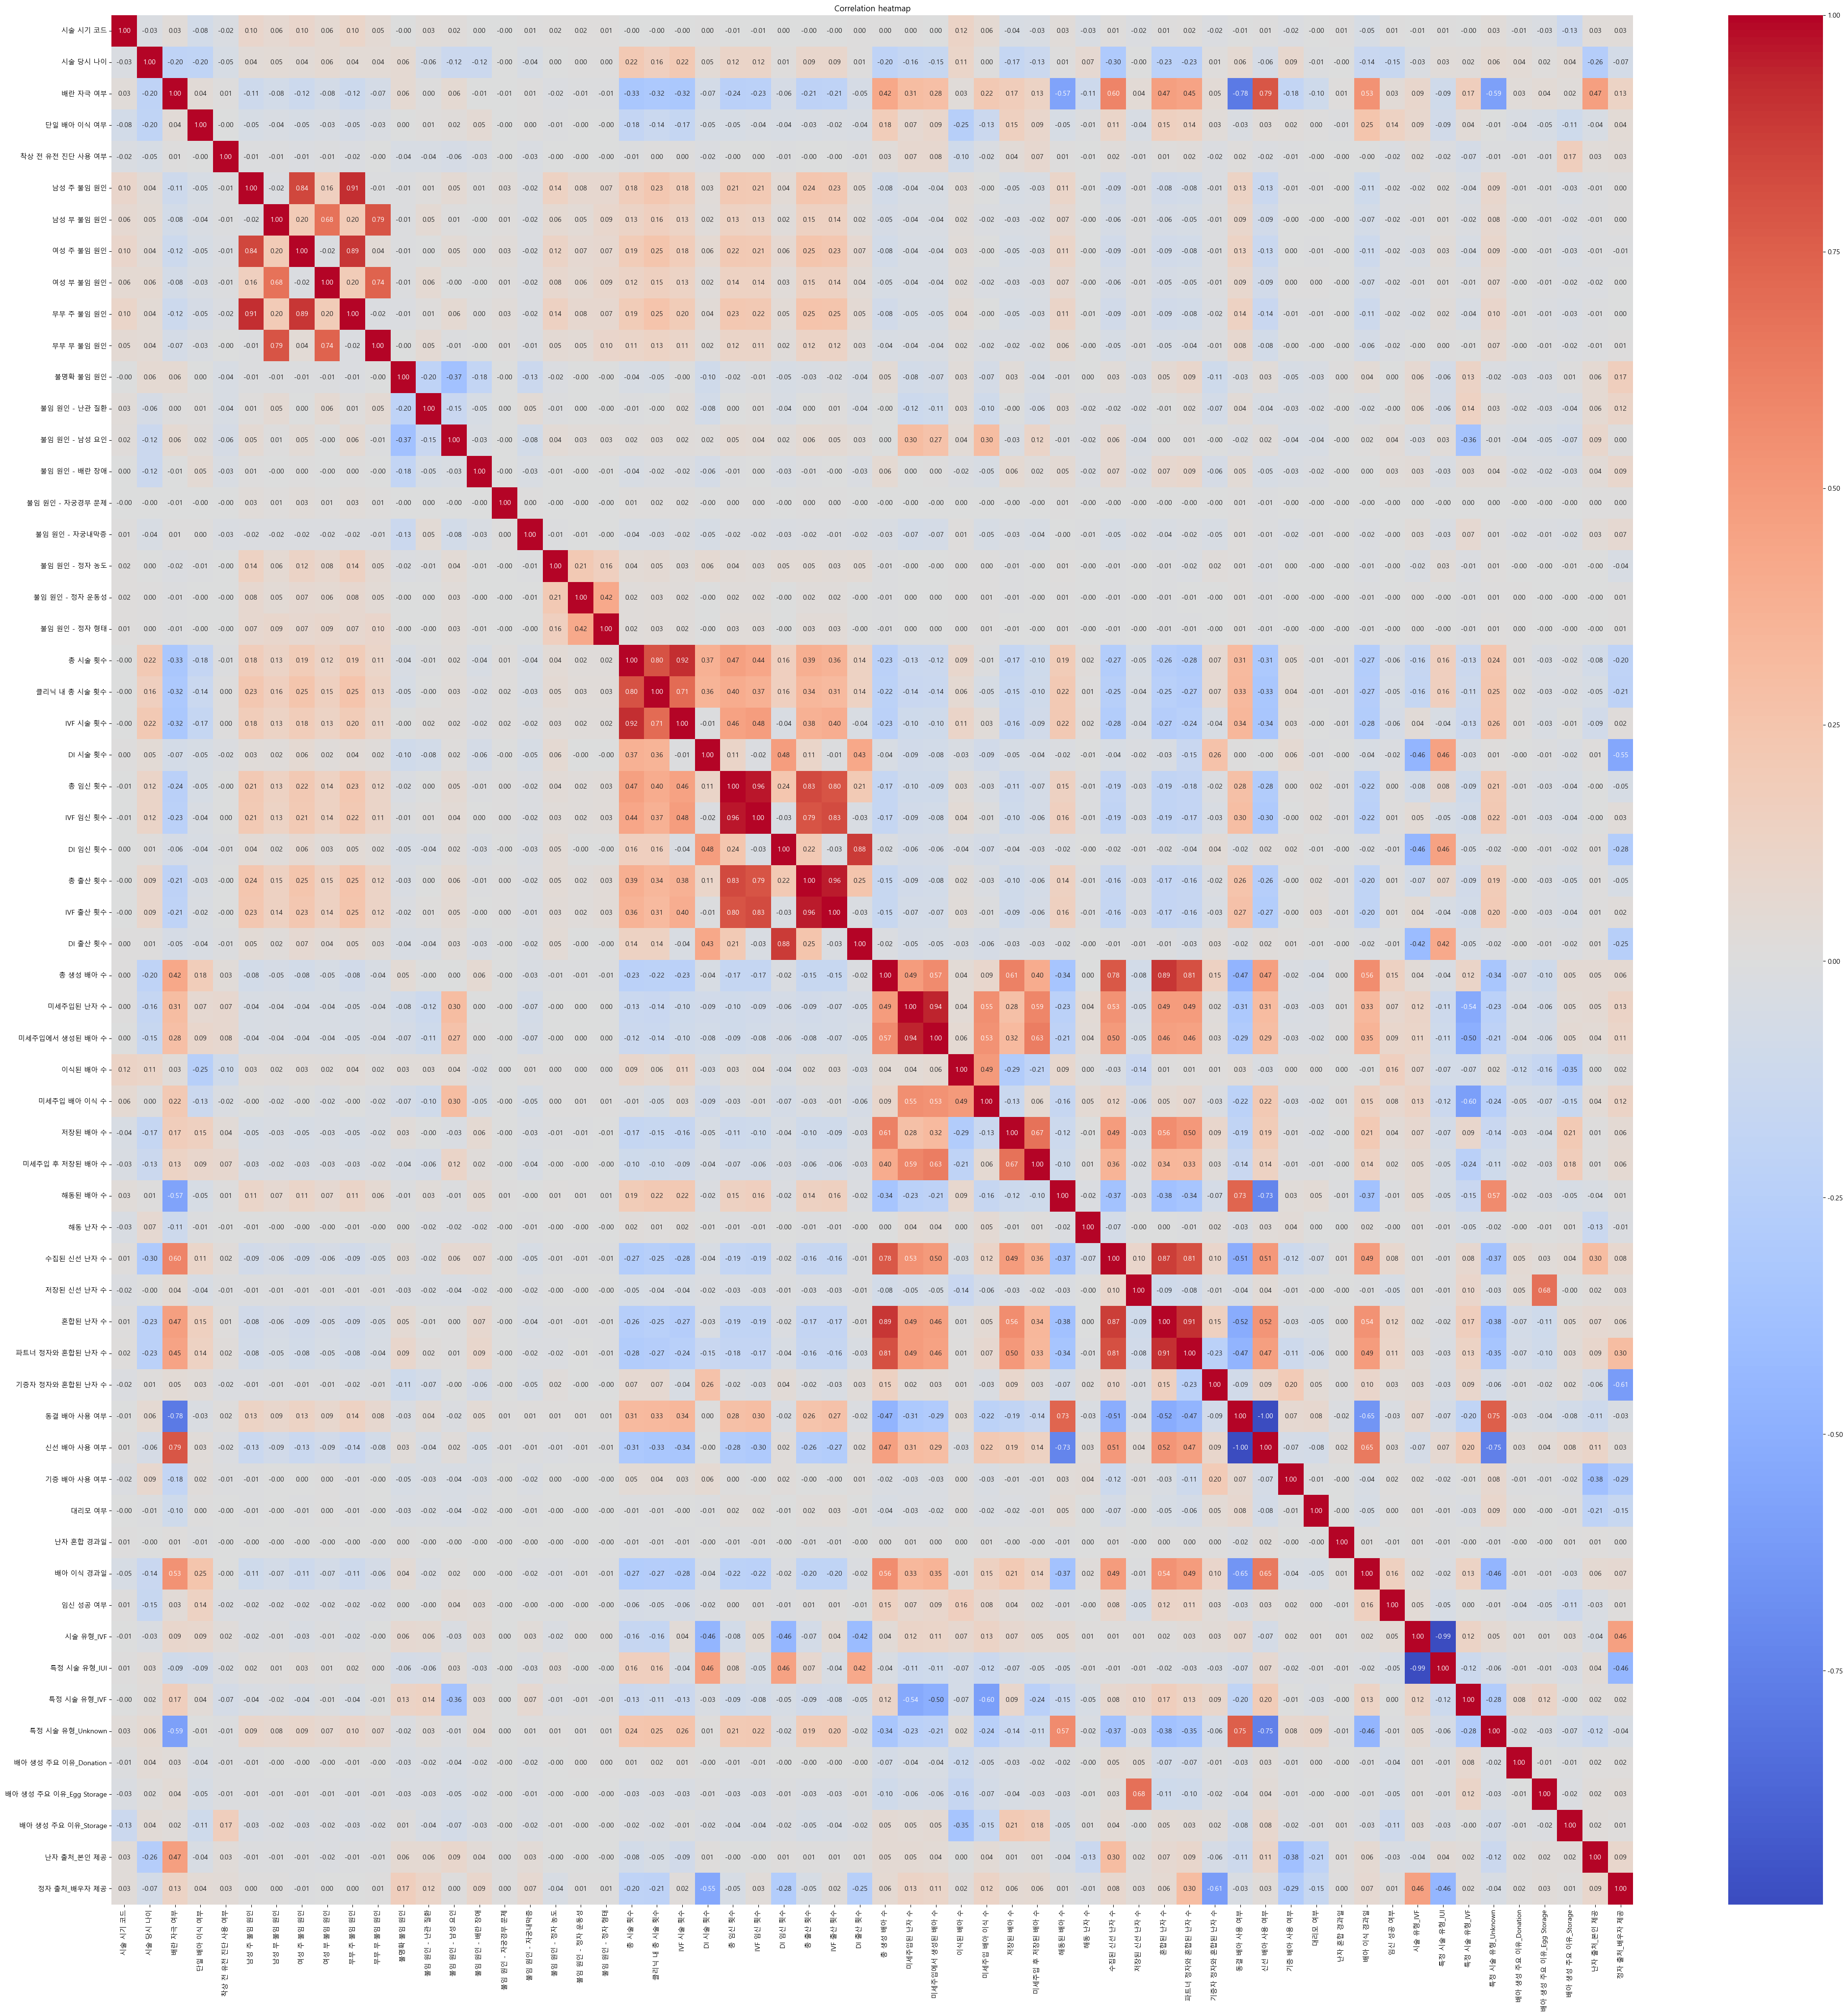

In [22]:
correlation_matrix = train.corr()

# 히트맵 그리기
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, 
            annot=True,        # 상관계수 숫자 표시
            fmt=".2f",         # 소수점 둘째 자리까지 표시
            cmap='coolwarm',   # 색상 팔레트
            cbar=True)         # 컬러 바 표시
plt.title('Correlation heatmap')
plt.show()

In [23]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.9 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.9 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars > 0.9]  # 0.9 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.9 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

남성 주 불임 원인: 부부 주 불임 원인: 0.91
부부 주 불임 원인: 남성 주 불임 원인: 0.91
총 시술 횟수: IVF 시술 횟수: 0.92
IVF 시술 횟수: 총 시술 횟수: 0.92
총 임신 횟수: IVF 임신 횟수: 0.96
IVF 임신 횟수: 총 임신 횟수: 0.96
총 출산 횟수: IVF 출산 횟수: 0.96
IVF 출산 횟수: 총 출산 횟수: 0.96
미세주입된 난자 수: 미세주입에서 생성된 배아 수: 0.94
미세주입에서 생성된 배아 수: 미세주입된 난자 수: 0.94
혼합된 난자 수: 파트너 정자와 혼합된 난자 수: 0.91
파트너 정자와 혼합된 난자 수: 혼합된 난자 수: 0.91


In [24]:
train.drop(columns=['남성 주 불임 원인','IVF 시술 횟수','IVF 임신 횟수','IVF 출산 횟수','미세주입에서 생성된 배아 수',
                    '파트너 정자와 혼합된 난자 수'],inplace=True)
test.drop(columns=['남성 주 불임 원인','IVF 시술 횟수','IVF 임신 횟수','IVF 출산 횟수','미세주입에서 생성된 배아 수',
                    '파트너 정자와 혼합된 난자 수'],inplace=True)

In [25]:
train.drop(columns=['부부 부 불임 원인','총 시술 횟수','총 출산 횟수','수집된 신선 난자 수','동결 배아 사용 여부',
                    '신선 배아 사용 여부'],inplace=True)
test.drop(columns=['부부 부 불임 원인','총 시술 횟수','총 출산 횟수','수집된 신선 난자 수','동결 배아 사용 여부',
                    '신선 배아 사용 여부'],inplace=True)

In [26]:
train.drop(columns=['여성 주 불임 원인','DI 임신 횟수','DI 출산 횟수','혼합된 난자 수'],inplace=True)
test.drop(columns=['여성 주 불임 원인','DI 임신 횟수','DI 출산 횟수','혼합된 난자 수'],inplace=True)

In [27]:
# # 상관행렬 계산
# corr_matrix = train.corr()

# # 상관관계가 0.7 이상인 값만 선택 (자기 자신과의 상관관계 제외)
# high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]

# # 결과를 변수와 해당 변수와 0.7 이상인 상관관계를 가진 다른 변수들로 출력
# for col in high_corr.columns:
#     related_vars = high_corr[col].dropna()  # 결측치 제외
#     related_vars = related_vars[related_vars >= 0.7]  # 0.7 이상인 값만 선택
#     if len(related_vars) > 0:  # 상관관계가 0.7 이상인 값이 있을 경우
#         print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

In [28]:
# # ✅ 다중공선성이 높은 컬럼 리스트
# drop_cols = [
#     "배란 자극 여부", "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
#     "부부 주 불임 원인", "부부 부 불임 원인", "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "IVF 시술 비율",
#     "DI 시술 횟수", "DI 시술 비율", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", "IVF 출산 횟수",
#     "DI 출산 횟수", "총 생성 배아 수", "미세주입된 난자 수", "미세주입에서 생성된 배아 수", "미세주입 배아 이식 수",
#     "해동된 배아 수", "수집된 신선 난자 수", "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "동결 배아 사용 여부",
#     "신선 배아 사용 여부", "출산 성공률", "IVF 출산 비율", "DI 출산 비율", "미세주입 성공률", "이식 성공률",
#     "특정 시술 유형_Unknown"
# ]

# # ✅ 다중공선성이 높은 컬럼 제거
# train = train.drop(columns=drop_cols, errors="ignore")
# test = test.drop(columns=drop_cols, errors="ignore")

# # ✅ 제거된 후 데이터 크기 확인
# print(f"After Drop - X_train shape: {train.shape}")
# print(f"After Drop - X_test shape: {test.shape}")


In [29]:
train.value_counts('임신 성공 여부')

임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64

In [30]:
# for feature in train.columns:
#     Q1 = train[feature].quantile(0.25)
#     Q3 = train[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # 이상치 제거
#     train = train[(train[feature] >= lower_bound) & (train[feature] <= upper_bound)]


In [31]:
train.value_counts('임신 성공 여부')

임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np

# ✅ 데이터 분할
X = train.drop(columns=['임신 성공 여부'])
y = train['임신 성공 여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
models = {
    #"Extra Trees": ExtraTreesClassifier(max_depth= 10, min_samples_split = 5, n_estimators = 500, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(depth = 6, iterations= 300, learning_rate= 0.05, verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(max_depth=6, learning_rate= 0.05, n_estimators= 300, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(max_depth = 5, learning_rate= 0.05, n_estimators=500, random_state=42, n_jobs=-1),
    #"Random Forest": RandomForestClassifier(max_depth=10, n_estimators=500, min_samples_split=5, random_state=42),
}

In [35]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.calibration import calibration_curve 
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import VotingClassifier

In [51]:
# ✅ 각 모델별 Test 예측값을 저장할 리스트 (Soft Voting 적용을 위한 확률 평균)
test_predictions = {name: np.zeros(X_test.shape[0]) for name in models.keys() if hasattr(models[name], "predict_proba")}
submission_predictions = {name: np.zeros(test.shape[0]) for name in models.keys() if hasattr(models[name], "predict_proba")}

# ✅ KFold 적용
roc_auc_scores = []  # ROC-AUC 점수 저장 리스트

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n=== Fold {fold+1} ===")

    # KFold 데이터 분할
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # `predict_proba()`를 지원하는 모델만 사용
            print(f"\n--- Training {name} ---")
            
            # 모델 학습
            model.fit(X_train_fold, Y_train_fold)

            # ✅ 검증 데이터 예측 (Positive Class 확률만 저장)
            Y_val_pred_proba = model.predict_proba(X_val_fold)[:, 1]

            # ✅ ROC-AUC 점수 계산 및 저장
            roc_auc = roc_auc_score(Y_val_fold, Y_val_pred_proba)
            roc_auc_scores.append(roc_auc)
            print(f"📊 ROC-AUC (Fold {fold+1}, {name}): {roc_auc:.4f}")

            # ✅ X_test 예측값 저장 (Soft Voting을 위해 확률 예측값 사용)
            test_pred = model.predict_proba(X_test)[:, 1]  # Positive Class(1) 확률
            test_predictions[name] += test_pred / kf.n_splits  # 확률 평균 계산

            # ✅ 실제 test.csv 데이터 예측값 저장
            submission_pred = model.predict_proba(test)[:, 1]  # Positive Class(1) 확률
            submission_predictions[name] += submission_pred / kf.n_splits  # 확률 평균 계산

        else:
            print(f"⚠ Warning: {name} 모델은 `predict_proba()`를 지원하지 않습니다. 제외됨.")



=== Fold 1 ===

--- Training CatBoost ---
📊 ROC-AUC (Fold 1, CatBoost): 0.7396

--- Training LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42594, number of negative: 121470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 164064, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259618 -> initscore=-1.047954
[LightGBM] [Info] Start training from score -1.047954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [53]:
# ✅ Platt Scaling (Sigmoid) 적용
calibrated_lgbm = CalibratedClassifierCV(models["CatBoost"], method="sigmoid", cv=5)
calibrated_lgbm.fit(X_train, y_train)

# ✅ 보정된 확률 예측
calibrated_pred_proba_test = calibrated_lgbm.predict_proba(X_test)[:, 1]
calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# ✅ ROC-AUC 평가
calibrated_roc_auc = roc_auc_score(y_test, calibrated_pred_proba_test)
print(f"\n📊 Calibrated LightGBM ROC-AUC Score (Sigmoid): {calibrated_roc_auc:.4f}")

# ✅ test.csv에 대한 예측 확률 보정 적용
calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# ✅ Soft Voting 가중치 변경 (LightGBM의 영향력 증가)
ensemble_pred_proba_test = (
    calibrated_pred_proba_test * 0.3 +  # LightGBM 60%
    test_predictions["XGBoost"] * 0.3 +  # XGBoost 20%
    test_predictions["CatBoost"] * 0.4  # CatBoost 20%
)

ensemble_pred_proba_submission = (
    calibrated_pred_proba_submission * 0.3 +
    submission_predictions["XGBoost"] * 0.3 +
    submission_predictions["CatBoost"] * 0.4
)


from sklearn.metrics import roc_curve

# ✅ ROC Curve 기반 최적 Threshold 찾기 (Youden’s J Index)
fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred_proba_test)
youdens_j = tpr - fpr  # TPR - FPR 계산
optimal_idx = np.argmax(youdens_j)  # Youden’s J Index 최대값의 인덱스 찾기
optimal_threshold_roc = thresholds[optimal_idx]

print(f"Optimal Threshold (ROC-AUC 기준): {optimal_threshold_roc:.4f}")

# ✅ ROC-AUC 점수 계산
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)
print(f"\n📈 최종 ROC-AUC Score: {final_roc_auc:.4f}")

# ✅ 최적 Threshold 적용 후 예측값 변환
Y_test_pred = (ensemble_pred_proba_test > optimal_threshold_roc).astype(int)

print("\n=== Final Test Evaluation with Optimized Threshold (ROC-AUC) ===")
print(classification_report(y_test, Y_test_pred))



📊 Calibrated LightGBM ROC-AUC Score (Sigmoid): 0.7384
Optimal Threshold (ROC-AUC 기준): 0.2439

📈 최종 ROC-AUC Score: 0.7386

=== Final Test Evaluation with Optimized Threshold (ROC-AUC) ===
              precision    recall  f1-score   support

           0       0.89      0.56      0.68     38145
           1       0.38      0.79      0.51     13126

    accuracy                           0.62     51271
   macro avg       0.63      0.67      0.60     51271
weighted avg       0.76      0.62      0.64     51271



In [54]:
# ✅ Kaggle 제출 파일 생성
submission_filename = f'./data/submission_calibrated_ensemble_{final_roc_auc:.4f}.csv'

# ✅ Kaggle 제출 파일 저장
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['probability'] = submission_predictions["XGBoost"]  # XGBoost를 중심으로 설정
sample_submission.to_csv(submission_filename, index=False)

print(f"\n✅ 제출 파일이 생성되었습니다: {submission_filename}")


✅ 제출 파일이 생성되었습니다: ./data/submission_calibrated_ensemble_0.7386.csv
